In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("RELIANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4690 non-null   float64
 14  %Deliverble         4690 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

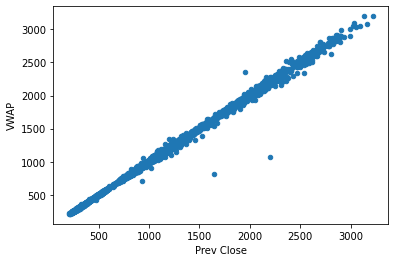

In [4]:
df.plot(x="Prev Close", y="VWAP", kind="scatter")

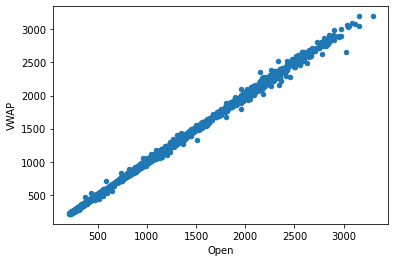

In [6]:
df.plot(x="Open", y="VWAP", kind="scatter")

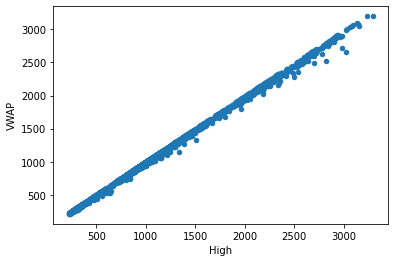

In [13]:
df.plot(x="High", y="VWAP", kind="scatter")

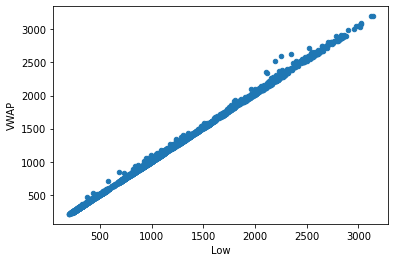

In [14]:
df.plot(x="Low", y="VWAP", kind="scatter")

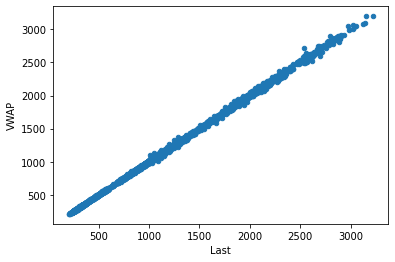

In [15]:
df.plot(x="Last", y="VWAP", kind="scatter")

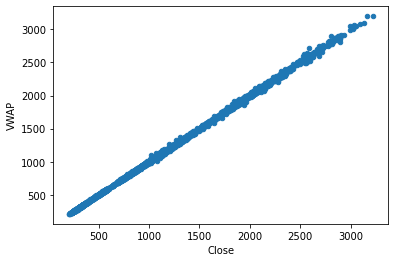

In [16]:
df.plot(x="Close", y="VWAP", kind="scatter")

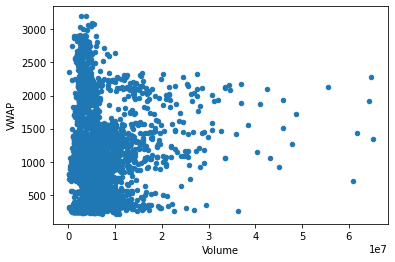

In [8]:
df.plot(x="Volume", y="VWAP", kind="scatter")

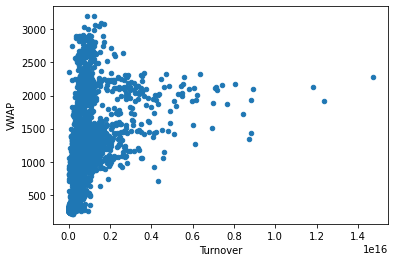

In [9]:
df.plot(x="Turnover", y="VWAP", kind="scatter")

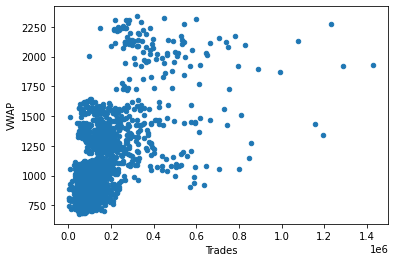

In [10]:
df.plot(x="Trades", y="VWAP", kind="scatter")

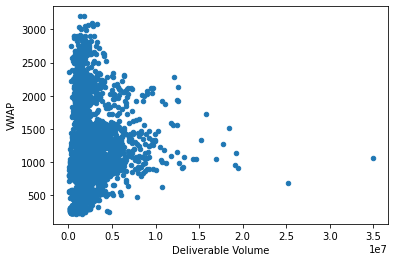

In [11]:
df.plot(x="Deliverable Volume", y="VWAP", kind="scatter")

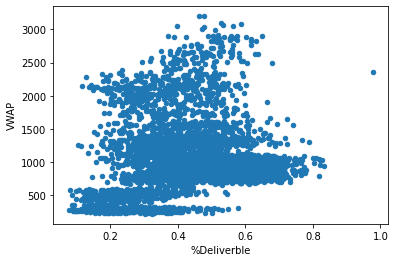

In [12]:
df.plot(x="%Deliverble", y="VWAP", kind="scatter")

In [17]:
X = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume']].values
y = df['VWAP'].values

In [20]:
X

array([[2.3305000e+02, 2.3750000e+02, 2.5170000e+02, ..., 2.5170000e+02,
        2.5170000e+02, 4.4564240e+06],
       [2.5170000e+02, 2.5840000e+02, 2.7185000e+02, ..., 2.7185000e+02,
        2.7185000e+02, 9.4878780e+06],
       [2.7185000e+02, 2.5665000e+02, 2.8790000e+02, ..., 2.8675000e+02,
        2.8250000e+02, 2.6833684e+07],
       ...,
       [1.9640500e+03, 1.9800000e+03, 1.9929500e+03, ..., 1.9475000e+03,
        1.9478000e+03, 1.5062376e+07],
       [1.9478000e+03, 1.9530500e+03, 1.9650000e+03, ..., 1.9570000e+03,
        1.9526000e+03, 1.1924527e+07],
       [1.9526000e+03, 1.9405000e+03, 1.9561000e+03, ..., 1.9405000e+03,
        1.9298000e+03, 2.1845931e+07]])

In [22]:
y

array([ 249.37,  263.52,  274.79, ..., 1969.06, 1946.67, 1935.45])

# Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
print(model.coef_)

[ 3.21869653e-02  9.13386740e-03  3.26257168e-01  3.06117161e-01
 -1.93619338e-01  5.19864037e-01  5.43123054e-08]


In [26]:
print(model.intercept_)

-0.24217219778233812


In [27]:
Lr_score = model.score(X_test, y_test)
Lr_score

0.9998911719280495


# Gradient Boosting

In [28]:
from sklearn import ensemble
gboost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1)
gboost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [29]:
Gboost_score = gboost.score(X_test, y_test)
Gboost_score

0.9998166861467356

# XGBoost Regression

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [31]:
xgb = XGBRegressor()
print(xgb)

XGBRegressor()


In [33]:
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

[09:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9998873075941258

In [35]:
XGBoost_score = xgb.score(X_test,y_test)
XGBoost_score

0.9996069980568322

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
y_predicted = xgb.predict(X_test)
y_predicted

array([1129.551  , 1333.4556 ,  698.5262 , ..., 1008.0991 , 1180.9601 ,
        465.94174], dtype=float32)

In [39]:
mse = mean_squared_error(y_test, y_predicted)
print("MSE : ", mse)

MSE :  126.11328190082514


In [40]:
print("Linear Regression Accuracy : ", Lr_score)
print("Gradient Boost Regression Accuracy : ", Gboost_score)
print("XGBoost Regression Accuracy : ", XGBoost_score)

Linear Regression Accuracy :  0.9998911719280495
Gradient Boost Regression Accuracy :  0.9998166861467356
XGBoost Regression Accuracy :  0.9996069980568322
